HW6-2: Hugging Face-  AI 應用

Using device: cuda
Input Chinese Text: 一個狗和一隻貓
Translating text...
Translated Text: A dog and a cat.


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]c:\Users\jing5\Anaconda3\envs\hw6\lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\jing5\.cache\huggingface\hub\models--CompVis--stable-diffusion-v1-4. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Fetching 16 files: 100%|██████████| 16/16 [00:22

Generating image from text...


100%|██████████| 50/50 [12:28<00:00, 14.98s/it]


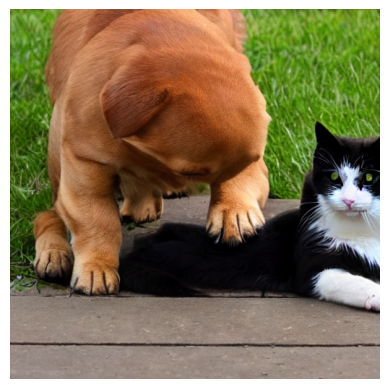

In [ ]:
import torch
from transformers import MarianMTModel, MarianTokenizer, AutoModelForCausalLM, AutoTokenizer
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import numpy as np

# 確認是否使用 GPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# 翻譯中文至英文
def translate_chinese_to_english(chinese_text):
    model_name = "Helsinki-NLP/opus-mt-zh-en"
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    model = MarianMTModel.from_pretrained(model_name).to(device)

    # 將文本轉換為張量並移至 GPU
    inputs = tokenizer(chinese_text, return_tensors="pt", padding=True, truncation=True).to(device)
    translated_tokens = model.generate(**inputs)
    translated_text = tokenizer.batch_decode(translated_tokens, skip_special_tokens=True)
    return translated_text[0] if translated_text else None

# 使用 Stable Diffusion 生成圖片
def generate_image_from_text(text):
    model_name = "CompVis/stable-diffusion-v1-4"
    pipeline = StableDiffusionPipeline.from_pretrained(
        model_name,
        torch_dtype=torch.float16,
        resume_download=True  # 自動恢復中斷的下載
    ).to(device)

    # 將生成過程限制在 GPU 上
    print("Generating image from text...")
    output_image = pipeline(text).images[0]

    # 顯示圖片
    plt.imshow(np.array(output_image))
    plt.axis("off")
    plt.show()

# 主程式
try:
    # 輸入中文文本
    chinese_text = "一個狗和一隻貓"
    print(f"Input Chinese Text: {chinese_text}")

    # 翻譯文本
    print("Translating text...")
    translated_text = translate_chinese_to_english(chinese_text)
    print(f"Translated Text: {translated_text}")

    # 根據翻譯後的文本生成圖片
    if translated_text:
        generate_image_from_text(translated_text)
    else:
        print("Translation failed or empty.")

except Exception as e:
    print(f"An error occurred: {e}")